<h3>Question 1</h3>

In [1]:
import numpy as np

In [2]:
# givens and some calculations
energy_intakes = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
alpha = 0.05
mu_0 = 7725
mean = energy_intakes.mean()
stdv = energy_intakes.std(ddof = 1) # dividing by n-1 for sample standard deviation rather than n
n = len(energy_intakes)
sem = stdv / np.sqrt(n)
df = n - 1

In [3]:
t_statistic = (mean - mu_0) / sem

In [4]:
from scipy import stats

In [5]:
# this calculates the p-value using stats. found it on stackexchange.
p_value = 2 * stats.t.sf(abs(t_statistic), df)

In [6]:
p_value < alpha

True

In [7]:
# Null hypothesis rejected

In [8]:
print(mean, stdv, sem, t_statistic, df, p_value)

6753.636363636364 1142.1232221373727 344.3631083801271 -2.8207540608310198 10 0.018137235176105812


<h3>Question 2</h3>

In [9]:
# values for ireland
n_ireland = 42
mean_ireland = 74
stdv_ireland = 7.4

# values for elsewhere
n_elsewhere = 61
mean_elsewhere = 57
stdv_elsewhere = 7.1

In [10]:
sem_ireland = ( stdv_ireland ** 2 ) / n_ireland
sem_elsewhere = ( stdv_elsewhere ** 2 ) / n_elsewhere

In [11]:
# preparing to calculate the degrees of freedom for a cleaner setup
sigma_over_n_1 = (stdv_ireland ** 2 / n_ireland)
sigma_over_n_2 = (stdv_elsewhere ** 2 / n_elsewhere)

df_1 = n_ireland - 1
df_2 = n_elsewhere - 1

In [12]:
# from the report
df = (sigma_over_n_1 + sigma_over_n_2) ** 2 / ( (sigma_over_n_1/df_1) + (sigma_over_n_2/df_2) )
df

99.57034299011586

In [13]:
t_statistic = (mean_ireland - mean_elsewhere) / (np.sqrt(sem_ireland + sem_elsewhere))

In [14]:
t_statistic

11.647653131319812

In [15]:
# this calculates the p-value using stats. found it on stackexchange.
p_value = 2 * stats.t.sf(abs(t_statistic), df)

In [16]:
p_value

2.6886769781171285e-20

In [17]:
p_value < alpha

True

In [18]:
# Null Hypo. rejected

<h3>Question 3</h3>

In [19]:
# Same functions I used in Assignment 2 to import and clean data from worldbank
# Just so I don't have to use them again

import pandas as pd
from unidecode import unidecode

def import_world_bank_csv(csv, no_of_rows_to_skip):
    
    data = pd.read_csv(csv, skiprows=no_of_rows_to_skip)
    
    for column in data.columns:
        
        if data[column].dtype == "object":
            
            # This was on this forum:
            # https://stackoverflow.com/questions/54650276/if-not-this-or-this-then-in-lambda-python-pandas
            # Trial and error basically
            data[column] = data[column].apply(lambda x: unidecode(str(x)) if isinstance(x, str) else x)
            
    return data

def adjust_and_clean_csv(dataframe, data_name):
    
    # Locating the column that contains unnamed, (did it as a subset because some columns contain 68 and some 5)
    dataframe = dataframe.loc[:, ~dataframe.columns.str.contains('^Unnamed')]
    # Removing more useless columns and cleaning up the data
    dataframe = dataframe.drop(columns=['Indicator Name', 'Indicator Code'])
    # Found the melt function on stackexchange to put the headers in the columns so I can better manipulate the
    # data. It makes it easier for me to merge and plot later on. 
    # Note: I first ran through the code normally before I found the use to build the code into functions.
    dataframe = dataframe.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name = data_name)
    # Changing the year column to numeric insted of strings.
    dataframe['Year'] = pd.to_numeric(dataframe['Year'])
    
    return dataframe
# Nested functions to import and clean CSVs directly.
def import_and_clean(csv, no_of_rows_to_skip, data_name):
    
    clean_dataframe = import_world_bank_csv(csv, no_of_rows_to_skip)
    clean_dataframe = adjust_and_clean_csv(clean_dataframe, data_name)
    
    return clean_dataframe

def combine_columns_from_another_dataframe(from_dataframe, to_dataframe):
    
    common_columns = list(set(from_dataframe.columns).intersection(set(to_dataframe.columns)))
    
    combined_frame = pd.merge(to_dataframe, from_dataframe, on = common_columns,
                              how = "right")
    
    return combined_frame

In [20]:
# importing data and using the functions to clean and organize
fertility_rate = import_and_clean("fertility.csv", 4, "Fertility Rate")
gdp_ppp = import_and_clean("gdp.csv", 4, "GDP Per Capita")

In [21]:
# combining both the gdp per capita and fertility rates together
fertility_and_gdp = combine_columns_from_another_dataframe(fertility_rate, gdp_ppp)

In [22]:
# Only selecting values for 2013
fertility_and_gdp_2013 = fertility_and_gdp[fertility_and_gdp["Year"] == 2013]

In [23]:
import matplotlib.pyplot as plt

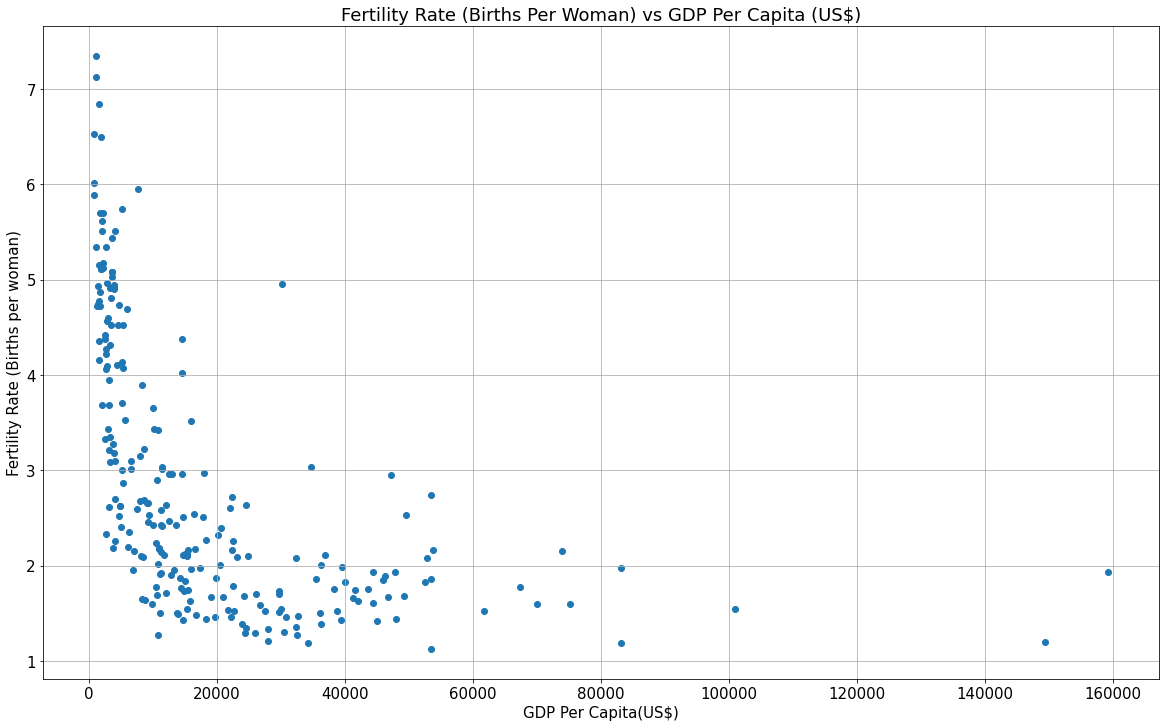

In [24]:
# setting font size and figure size
plt.figure(figsize = (20, 12))
plt.rcParams.update({"font.size": 15})

# plotting scatter plot
plt.scatter(fertility_and_gdp_2013["GDP Per Capita"], fertility_and_gdp_2013["Fertility Rate"])

# x and y labels, title, and major grid
plt.xlabel('GDP Per Capita(US$)')
plt.ylabel('Fertility Rate (Births per woman)')
plt.title('Fertility Rate (Births Per Woman) vs GDP Per Capita (US$)')
plt.grid(True)
plt.show()

In [25]:
# removing na values so that I don't get an na corrcoef for the values
fertility_and_gdp_2013 = fertility_and_gdp_2013.dropna()

In [26]:
#finding the correlation coefficient using np.corrcoef between GDP per capita and Fertility Rate
# this is an estimate to the mother formula (in the report)
np.corrcoef(fertility_and_gdp_2013["GDP Per Capita"], fertility_and_gdp_2013["Fertility Rate"])

array([[ 1.        , -0.51710117],
       [-0.51710117,  1.        ]])

<h3>Question 4</h3>

In [27]:
# importing excel to pandas
housing_monthly_average = pd.read_excel("Monthly Average House Price.xls")

In [28]:
# creating a new column that calculates the rate of return for each row (month)
housing_monthly_average["% Return"] = housing_monthly_average["Average House Price"].pct_change()

In [29]:
# selecting only the three useful columns
housing_monthly_average = housing_monthly_average[["Unnamed: 0", "Average House Price", "% Return"]]

In [30]:
# renaming the unnamed column to date since it's a date
housing_monthly_average.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)

In [31]:
# making the entries in the column in datetime format so I can plot them
# i'm pretty sure pandas can handle, but this is standard procedure so i did it
housing_monthly_average["Date"] = pd.to_datetime(housing_monthly_average["Date"])

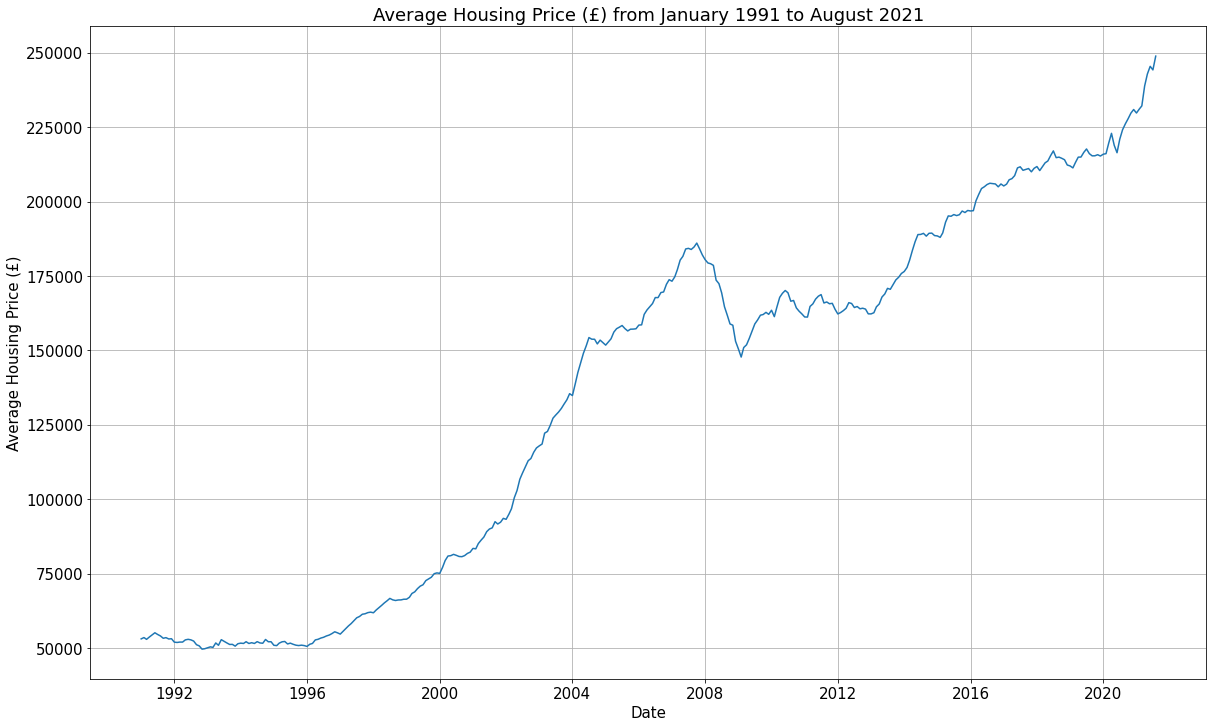

In [32]:
# setting font size and figure size
plt.figure(figsize=(20, 12))
plt.rcParams.update({"font.size": 15})

# plotting plot
plt.plot(housing_monthly_average["Date"], housing_monthly_average["Average House Price"])

# x and y labels, title, and major grid
plt.xlabel('Date')
plt.ylabel('Average Housing Price (£)')
plt.title('Average Housing Price (£) from January 1991 to August 2021')
plt.grid(True)
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

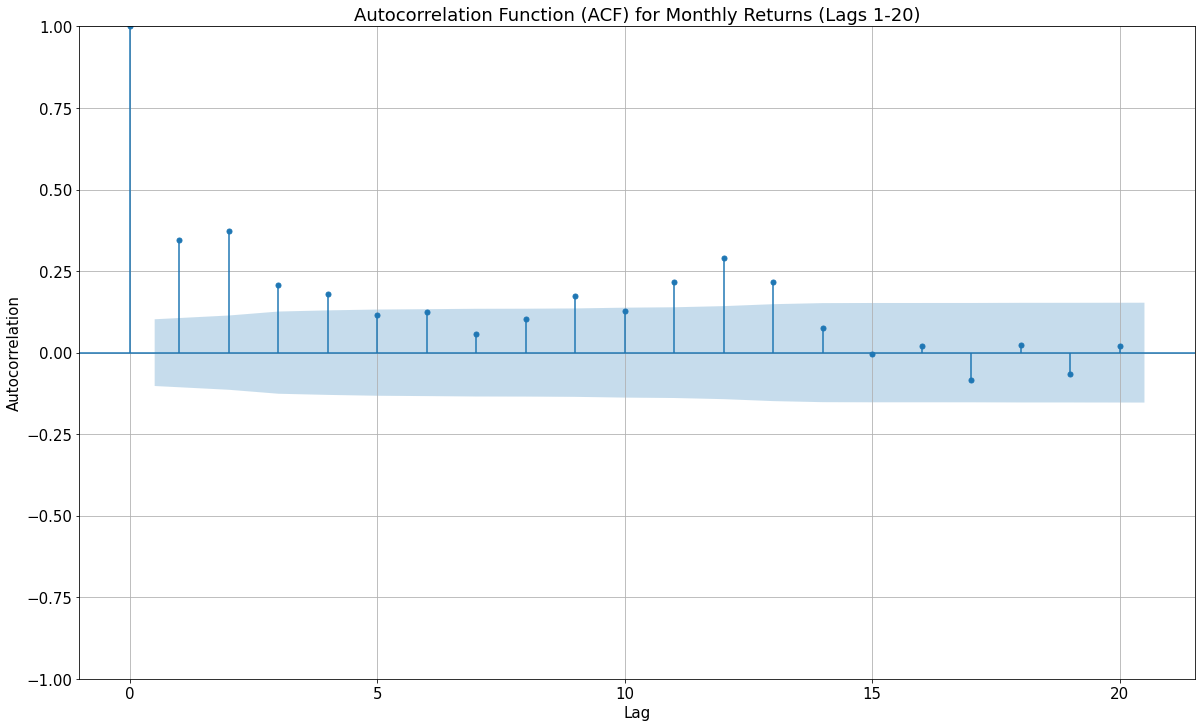

In [34]:
# setting font size and figure size
plt.rcParams.update({"font.size": 15})

fig, ax = plt.subplots(figsize = (20, 12))

# I found this in stackexchange as well, and it gives a nice graph without the extra work
# the dropna() was added because I was getting nothing when I graphed
# lags as requested in the question
# alpha = 0.05 as the threshold suggests
# used fig, ax because plot_acf was not updating format using plt.figure, so I changed the format. Did not really
# think about it

plot_acf(housing_monthly_average['% Return'].dropna(), lags=20, alpha = 0.05, ax = ax)

# x and y labels, title, and major grid
plt.title('Autocorrelation Function (ACF) for Monthly Returns (Lags 1-20)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [35]:
# finding the first and last price in the dataset
start_price = housing_monthly_average['Average House Price'].iloc[0]
end_price = housing_monthly_average['Average House Price'].iloc[-1]

In [36]:
# by logic, divide by 12 to get the number of months (matching with the dataset)
no_of_years = ( len(housing_monthly_average)/12 )

In [37]:
# using the formula in the report, but just in code
annualized_ror = ( ( end_price / start_price ) ** (1 / no_of_years) - 1 ) * 100

In [38]:
print(annualized_ror)

5.169209278488096


<h3>Question 5</h3>

In [39]:
# csv to pandas dataframe
ftse100 = pd.read_csv("FTSE100.csv")

In [40]:
# sorting it to get it from 1991 upwards and not the other way
ftse100.sort_index(ascending = False, inplace = True)

In [41]:
# selecting the adj close and data columns
ftse100 = ftse100[["Date", "Adj Close"]]

In [42]:
# making the date column into datetime format
ftse100["Date"] = pd.to_datetime(ftse100["Date"])

In [43]:
# new column with return rate for each row (month)
ftse100["% Return"] = ftse100["Adj Close"].pct_change()

In [44]:
# matching it with the date from the available dates for FTSE
housing_monthly_average_slice = housing_monthly_average[housing_monthly_average["Date"] <= "2016-12-1"]

In [45]:
# setting index to skip some steps later on when normalizing
# following the same logic I used in assignment 1
housing_monthly_average_slice.set_index("Date", inplace = True)
ftse100.set_index("Date", inplace = True)

In [46]:
# normalizing by applying the logic of dividing each entry by the first one then by the value I want to achieve
normalized_ftse100 = ftse100.apply(lambda x: (x / x.iloc[0]) * 100)
normalized_housing_monthly_average_slice = housing_monthly_average_slice.apply(lambda x: (x / x.iloc[0]) * 100)

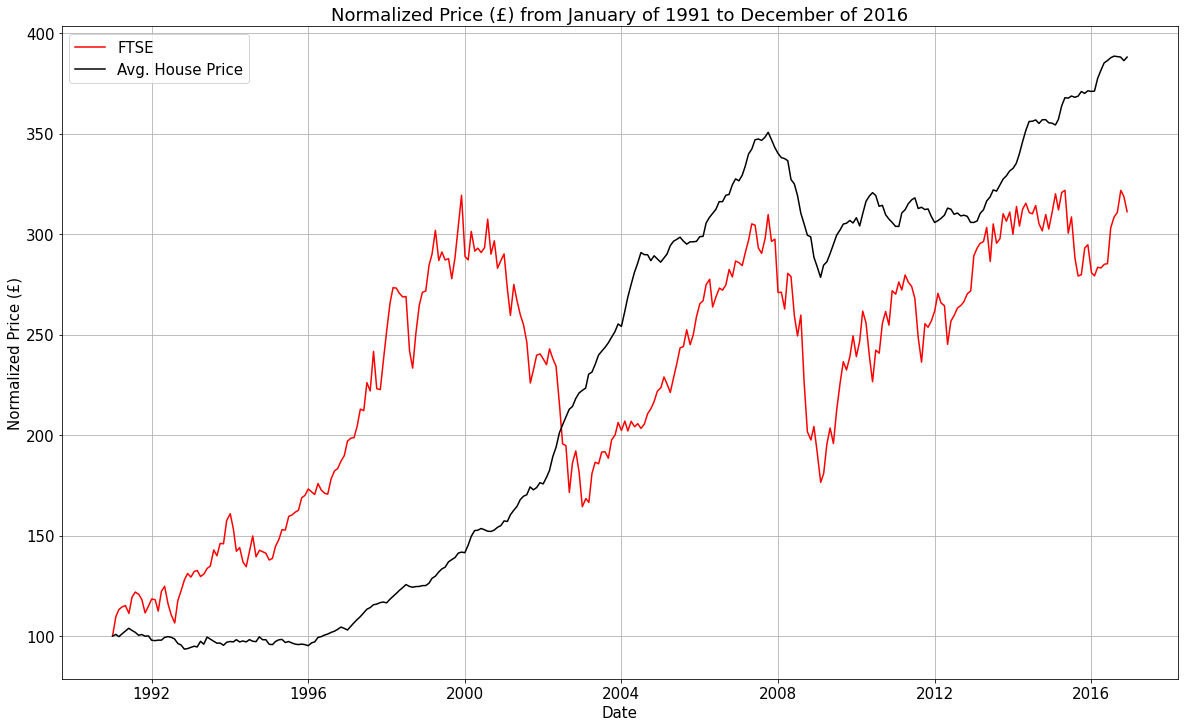

In [47]:
plt.rcParams.update({"font.size": 15})
plt.figure(figsize = (20, 12))

plt.plot(normalized_ftse100.index,
         normalized_ftse100["Adj Close"],
        label = "FTSE",
        color = "red")
plt.plot(normalized_housing_monthly_average_slice.index,
         normalized_housing_monthly_average_slice["Average House Price"],
        label = "Avg. House Price",
        color = "black")

plt.title('Normalized Price (£) from January of 1991 to December of 2016')
plt.xlabel('Date')
plt.ylabel('Normalized Price (£)')
plt.legend()

plt.grid(True)
plt.show()

In [48]:
# same logic as before
start_price = ftse100["Adj Close"].iloc[0]
end_price = ftse100["Adj Close"].iloc[-1]

In [49]:
# same logic as before
no_of_years = ( len(ftse100)/12 )

In [50]:
# same formula as before
annualized_ror = ( ( end_price / start_price ) ** (1 / no_of_years) - 1 ) * 100

In [51]:
print(annualized_ror)

4.462515478640672
